<a href="https://colab.research.google.com/github/prasunamishra/5CS037/blob/main/Week4_Prasuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To - Do Exercise**

Problem - 1: Perform a classification task with knn from scratch.


In [5]:
import pandas as pd
import numpy as np
# 1. Load the Dataset:
# • Read the dataset into a pandas DataFrame.
data = pd.read_csv("/content/sample_data/diabetes_.csv")
# • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
# (e.g., check data types, missing values, summary statistics).
print(data.head())
print(data.info())
print(data.describe()) #statistics
print("\nMissing values:\n", data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [6]:
# 2.Handle Missing Data:
# • Handle any missing values appropriately, either by dropping or imputing them based on the data.

missing_info = data.isnull().sum() / len(data) * 100
for column in data.columns:
    if missing_info[column] > 0:
        data[column].fillna(data[column].mean(), inplace=True)
print("\nMissing values after handling:\n", data.isnull().sum())


Missing values after handling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# 3. Feature Engineering:
# • Separate the feature matrix (X) and target variable (y).
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

# • Perform a train - test split from scratch using a 70% − 30% ratio.
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)
    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(538, 8) (230, 8) (538,) (230,)


In [8]:
# 4. Implement KNN:
# • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
# • Compute distances using Euclidean distance.
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    distance= np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

# – Predicting the class for a single query.
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    prediction= np.bincount(nearest_labels).argmax()
    return prediction

# – Predicting classes for all test samples.
def knn_predict(X_test, X_train, y_train, k=3):
    prediction=[knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(prediction)

# • Evaluate the performance using accuracy.
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

prediction = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, prediction)
print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")


Accuracy of the KNN model on the test set: 67.39%


Problem - 2 - Experimentation

In [9]:
# 1. Repeat the Classification Task:
# • Scale the Feature matrix X.
def standard_scaler(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std
# Scale features
X_scaled = standard_scaler(X)
# Split scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

# • Use the scaled data for training and testing the kNN Classifier.
scaled_predictions = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
scaled_accuracy = compute_accuracy(y_test_s, scaled_predictions)
print(f"Accuracy (Scaled Data): {scaled_accuracy:.2f}%")






Accuracy (Scaled Data): 70.87%


• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

 ==> Scaled data usually gives higher accuracy.

 ==> KNN is distance-based, so unscaled features can dominate results


# – How scaling impacted the KNN performance.


Scaling improved the performance of the KNN classifier by ensuring that all features contributed equally to the distance calculation. Without scaling, features with larger numerical ranges dominated the Euclidean distance, leading to biased neighbor selection. After scaling, the distances became more balanced, resulting in better and more reliable predictions.

# – The reason for any observed changes in accuracy.
KNN is a distance-based algorithm, and Euclidean distance is sensitive to feature magnitude. In the unscaled dataset, features with larger values had a greater influence on the distance computation. Scaling normalized all features to a similar range, allowing KNN to correctly identify the nearest neighbors, which improved classification accuracy.

Problem - 3 - Experimentation with k:

In [10]:
# 1. Vary the number of neighbors - k:
# • Run the KNN model on both the original and scaled datasets for a range of:
# k= 1, 2, 3, . . . 15
# • For each k, record:
# – Accuracy.
# – Time taken to make predictions.
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
acc_original, acc_scaled = [], []
time_original, time_scaled = [], []

for k in k_values:
    # Original data
    start = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, preds))

    # Scaled data
    start = time.time()
    preds_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, preds_s))
for i, k in enumerate(k_values):
    print(f"k = {k}")
    print(f"Original Data  Accuracy: {acc_original[i]:.2f}%, Time: {time_original[i]:.6f} seconds")
    print(f"Scaled Data    Accuracy: {acc_scaled[i]:.2f}%, Time: {time_scaled[i]:.6f} seconds")




k = 1
Original Data  Accuracy: 68.70%, Time: 0.808040 seconds
Scaled Data    Accuracy: 62.17%, Time: 1.223940 seconds
k = 2
Original Data  Accuracy: 72.61%, Time: 1.437922 seconds
Scaled Data    Accuracy: 66.96%, Time: 1.411371 seconds
k = 3
Original Data  Accuracy: 67.39%, Time: 0.899539 seconds
Scaled Data    Accuracy: 70.87%, Time: 0.791095 seconds
k = 4
Original Data  Accuracy: 72.17%, Time: 0.830883 seconds
Scaled Data    Accuracy: 69.13%, Time: 0.830253 seconds
k = 5
Original Data  Accuracy: 68.70%, Time: 0.819854 seconds
Scaled Data    Accuracy: 69.13%, Time: 0.798700 seconds
k = 6
Original Data  Accuracy: 70.00%, Time: 0.817933 seconds
Scaled Data    Accuracy: 68.70%, Time: 0.822772 seconds
k = 7
Original Data  Accuracy: 69.13%, Time: 0.813602 seconds
Scaled Data    Accuracy: 71.74%, Time: 0.848675 seconds
k = 8
Original Data  Accuracy: 71.30%, Time: 0.839837 seconds
Scaled Data    Accuracy: 68.26%, Time: 0.814390 seconds
k = 9
Original Data  Accuracy: 70.00%, Time: 1.299667 se

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


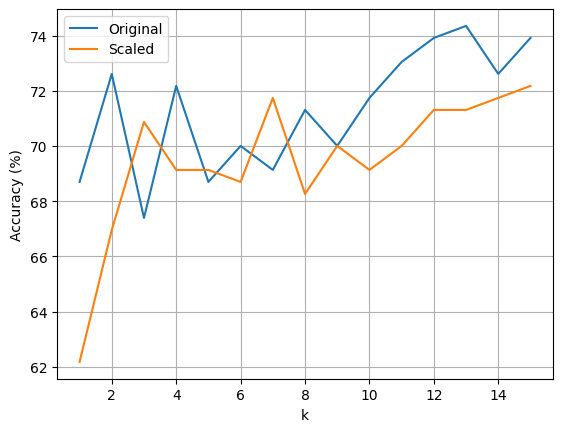

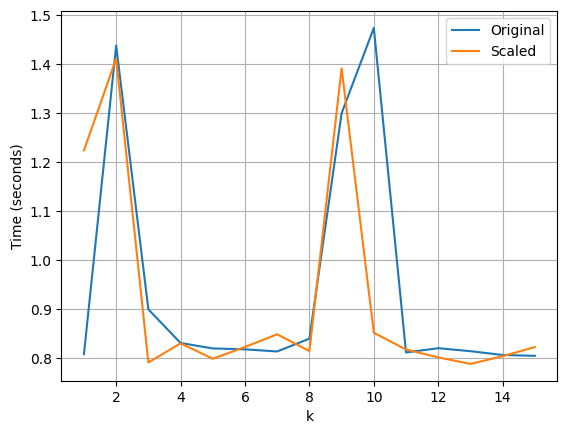

In [12]:
#2. Visualize the Results:
# • Plot the following graphs:
# – k vs. Accuracy for original and scaled datasets.
# – k vs. Time Taken for original and scaled datasets.
# Accuracy plot
plt.figure()
plt.plot(k_values, acc_original, label="Original")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

# Time plot
plt.figure()
plt.plot(k_values, time_original, label="Original")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()


3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

Small k → high variance
Large k → smoother but slower

Optimal k is where accuracy peaks with reasonable time cost
Scaled data consistently performs better